# 🚗 Used Car Price Analysis & Prediction

## 📌 Project Introduction

The Indian used-car market is rapidly growing, but buyers often face **ambiguity and lack of transparency** while evaluating vehicle prices, mileage impact, fuel preferences, and resale value.

This project focuses on **data-driven analysis of used car listings** to help users make **informed purchasing decisions**.  
The dataset was extracted by **web scraping the Spinny used-car marketplace** using **BeautifulSoup and Selenium**.

By applying **data cleaning, exploratory data analysis (EDA), hypothesis testing, and machine learning**, this project uncovers key factors influencing used car prices and predicts fair market value.

---


## 🎯 Business Problem

Buying a used car is often challenging due to:

- Large **price variations** for similar vehicles  
- Unclear impact of **kilometers driven, fuel type, transmission, and manufacturing year**  
- Lack of transparency in determining whether a car is **fairly priced or overpriced**

### ❓ Key Business Questions
- Do newer cars command significantly higher prices?
- Are automatic cars more likely to be expensive?
- How does mileage affect resale value?
- Does fuel type or brand influence price?
- What is the expected fair price for a car based on its features?

### 💡 Objective
The objective of this project is to **enhance decision-making for users planning to buy a used car** by:

- Removing ambiguity using **data-backed insights**
- Quantifying the impact of critical price drivers
- Providing **statistical validation** instead of assumptions
- Predicting prices using a **machine learning model**

This helps buyers make **confident, rational, and transparent purchasing decisions**.


## 🔍 Data Collection & Methodology

- Extracted real-world used car listings from Spinny using **BeautifulSoup and Selenium**
- Cleaned and standardized messy real-world data (prices, mileage units, states, missing values)
- Performed **Exploratory Data Analysis (EDA)** to identify trends and patterns
- Conducted **hypothesis testing** (Correlation, Chi-Square, Mann–Whitney U, Kruskal-Wallis)
- Validated insights using both **statistical methods and business logic**


## Importing required Libraries

In [218]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Importing the scrapped Dataset Extracted from Spinny using Selenium & Beautiful Soup

In [219]:
df=pd.read_csv(r"C:\Users\kakku\Downloads\final_dataset.xls")
df

,year,brand,model,variant,km,fuel,transmission,registration,price,location,city
0,2021,Renault,Kiger,RXZ 1.0 Turbo MT,76.5K km,petrol,manual,HR51,5.12 Lakh,"Sector 29, Gurgaon",delhi-ncr
1,2017,Maruti,Celerio,ZXi (O) AMT,43K km,petrol,automatic,HR26,3.77 Lakh,"Sector 27, Faridabad",delhi-ncr
2,2021,Maruti,Dzire,ZXi Plus,52.5K km,petrol,manual,DL1C,6 Lakh,"Dwarka, Delhi",delhi-ncr
3,2016,Honda,City,VX CVT,68K km,petrol,automatic,DL2C,5.42 Lakh,"Rohini, Delhi",delhi-ncr
4,2016,Hyundai,Grand i10,Sportz 1.2 Kappa VTVT,90K km,petrol,manual,DL12,3.31 Lakh,"Raj Nagar Extension, Ghaziabad",delhi-ncr
...,...,...,...,...,...,...,...,...,...,...,...
3915,2022,Hyundai,Venue,SX 1.0 Turbo iMT,31.5K km,petrol,manual,TS13,8.17 Lakh,"DSL Virtue Mall, Uppal",vishakapatnam
3916,2020,Maruti,Swift,VDi AMT,116.5K km,diesel,automatic,TS08,5.87 Lakh,"DSL Virtue Mall, Uppal",vishakapatnam
3917,2024,Hyundai,Verna,SX 1.5 Turbo Petrol MT,42.5K km,petrol,manual,TG07,11.98 Lakh,"Nexus Sujana Mall, Kukatpally",vishakapatnam
3918,2017,Ford,EcoSport,Titanium 1.5L Ti-VCT AT,56K km,petrol,automatic,TS07,6.21 Lakh,"D-Mart, Madhapur",vishakapatnam


## Data Exploration and Data Cleaning

In [220]:
df.head(7)

,year,brand,model,variant,km,fuel,transmission,registration,price,location,city
0,2021,Renault,Kiger,RXZ 1.0 Turbo MT,76.5K km,petrol,manual,HR51,5.12 Lakh,"Sector 29, Gurgaon",delhi-ncr
1,2017,Maruti,Celerio,ZXi (O) AMT,43K km,petrol,automatic,HR26,3.77 Lakh,"Sector 27, Faridabad",delhi-ncr
2,2021,Maruti,Dzire,ZXi Plus,52.5K km,petrol,manual,DL1C,6 Lakh,"Dwarka, Delhi",delhi-ncr
3,2016,Honda,City,VX CVT,68K km,petrol,automatic,DL2C,5.42 Lakh,"Rohini, Delhi",delhi-ncr
4,2016,Hyundai,Grand i10,Sportz 1.2 Kappa VTVT,90K km,petrol,manual,DL12,3.31 Lakh,"Raj Nagar Extension, Ghaziabad",delhi-ncr
5,2023,Volkswagen,Taigun,Topline 1.0 TSI AT,49.5K km,petrol,automatic,DL12,11.74 Lakh,"Sector 29, Gurgaon",delhi-ncr
6,2023,Toyota,Urban Cruiser Hyryder,V Hybrid,47K km,hybrid,automatic,HR87,15.09 Lakh,"Sector 29, Gurgaon",delhi-ncr


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          3920 non-null   int64 
 1   brand         3920 non-null   object
 2   model         3920 non-null   object
 3   variant       3920 non-null   object
 4   km            3920 non-null   object
 5   fuel          3920 non-null   object
 6   transmission  3920 non-null   object
 7   registration  3920 non-null   object
 8   price         3920 non-null   object
 9   location      3885 non-null   object
 10  city          3920 non-null   object
dtypes: int64(1), object(10)
memory usage: 337.0+ KB


In [222]:
df[['km','price']].head(5)

,km,price
0,76.5K km,5.12 Lakh
1,43K km,3.77 Lakh
2,52.5K km,6 Lakh
3,68K km,5.42 Lakh
4,90K km,3.31 Lakh


In [223]:
df['state']=df['registration'].str[:2].str.upper()
df

,year,brand,model,variant,km,fuel,transmission,registration,price,location,city,state
0,2021,Renault,Kiger,RXZ 1.0 Turbo MT,76.5K km,petrol,manual,HR51,5.12 Lakh,"Sector 29, Gurgaon",delhi-ncr,HR
1,2017,Maruti,Celerio,ZXi (O) AMT,43K km,petrol,automatic,HR26,3.77 Lakh,"Sector 27, Faridabad",delhi-ncr,HR
2,2021,Maruti,Dzire,ZXi Plus,52.5K km,petrol,manual,DL1C,6 Lakh,"Dwarka, Delhi",delhi-ncr,DL
3,2016,Honda,City,VX CVT,68K km,petrol,automatic,DL2C,5.42 Lakh,"Rohini, Delhi",delhi-ncr,DL
4,2016,Hyundai,Grand i10,Sportz 1.2 Kappa VTVT,90K km,petrol,manual,DL12,3.31 Lakh,"Raj Nagar Extension, Ghaziabad",delhi-ncr,DL
...,...,...,...,...,...,...,...,...,...,...,...,...
3915,2022,Hyundai,Venue,SX 1.0 Turbo iMT,31.5K km,petrol,manual,TS13,8.17 Lakh,"DSL Virtue Mall, Uppal",vishakapatnam,TS
3916,2020,Maruti,Swift,VDi AMT,116.5K km,diesel,automatic,TS08,5.87 Lakh,"DSL Virtue Mall, Uppal",vishakapatnam,TS
3917,2024,Hyundai,Verna,SX 1.5 Turbo Petrol MT,42.5K km,petrol,manual,TG07,11.98 Lakh,"Nexus Sujana Mall, Kukatpally",vishakapatnam,TG
3918,2017,Ford,EcoSport,Titanium 1.5L Ti-VCT AT,56K km,petrol,automatic,TS07,6.21 Lakh,"D-Mart, Madhapur",vishakapatnam,TS


In [224]:
df['fuel']=df['fuel'].str.lower()

In [225]:
df['price'] = (
    df['price']
    .astype(str)
    .str.lower()
    .str.strip()
)

mask = df['price'].str.contains('lakh', na=False)

df.loc[mask, 'price'] = (
    df.loc[mask, 'price']
    .str.replace('lakh', '', regex=False)
    .astype(float)
    * 100000
)

df['price'] = pd.to_numeric(df['price'], errors='coerce')
df

,year,brand,model,variant,km,fuel,transmission,registration,price,location,city,state
0,2021,Renault,Kiger,RXZ 1.0 Turbo MT,76.5K km,petrol,manual,HR51,512000.0,"Sector 29, Gurgaon",delhi-ncr,HR
1,2017,Maruti,Celerio,ZXi (O) AMT,43K km,petrol,automatic,HR26,377000.0,"Sector 27, Faridabad",delhi-ncr,HR
2,2021,Maruti,Dzire,ZXi Plus,52.5K km,petrol,manual,DL1C,600000.0,"Dwarka, Delhi",delhi-ncr,DL
3,2016,Honda,City,VX CVT,68K km,petrol,automatic,DL2C,542000.0,"Rohini, Delhi",delhi-ncr,DL
4,2016,Hyundai,Grand i10,Sportz 1.2 Kappa VTVT,90K km,petrol,manual,DL12,331000.0,"Raj Nagar Extension, Ghaziabad",delhi-ncr,DL
...,...,...,...,...,...,...,...,...,...,...,...,...
3915,2022,Hyundai,Venue,SX 1.0 Turbo iMT,31.5K km,petrol,manual,TS13,817000.0,"DSL Virtue Mall, Uppal",vishakapatnam,TS
3916,2020,Maruti,Swift,VDi AMT,116.5K km,diesel,automatic,TS08,587000.0,"DSL Virtue Mall, Uppal",vishakapatnam,TS
3917,2024,Hyundai,Verna,SX 1.5 Turbo Petrol MT,42.5K km,petrol,manual,TG07,1198000.0,"Nexus Sujana Mall, Kukatpally",vishakapatnam,TG
3918,2017,Ford,EcoSport,Titanium 1.5L Ti-VCT AT,56K km,petrol,automatic,TS07,621000.0,"D-Mart, Madhapur",vishakapatnam,TS


In [226]:
df['km']=(
    df['km']
    .astype(str)
    .str.lower()
    .str.replace(' km', '', regex=False)
    .str.replace('k', '', regex=False)
    .str.strip()
    .pipe(pd.to_numeric, errors='coerce')
    .mul(1000)
)
df

,year,brand,model,variant,km,fuel,transmission,registration,price,location,city,state
0,2021,Renault,Kiger,RXZ 1.0 Turbo MT,76500.0,petrol,manual,HR51,512000.0,"Sector 29, Gurgaon",delhi-ncr,HR
1,2017,Maruti,Celerio,ZXi (O) AMT,43000.0,petrol,automatic,HR26,377000.0,"Sector 27, Faridabad",delhi-ncr,HR
2,2021,Maruti,Dzire,ZXi Plus,52500.0,petrol,manual,DL1C,600000.0,"Dwarka, Delhi",delhi-ncr,DL
3,2016,Honda,City,VX CVT,68000.0,petrol,automatic,DL2C,542000.0,"Rohini, Delhi",delhi-ncr,DL
4,2016,Hyundai,Grand i10,Sportz 1.2 Kappa VTVT,90000.0,petrol,manual,DL12,331000.0,"Raj Nagar Extension, Ghaziabad",delhi-ncr,DL
...,...,...,...,...,...,...,...,...,...,...,...,...
3915,2022,Hyundai,Venue,SX 1.0 Turbo iMT,31500.0,petrol,manual,TS13,817000.0,"DSL Virtue Mall, Uppal",vishakapatnam,TS
3916,2020,Maruti,Swift,VDi AMT,116500.0,diesel,automatic,TS08,587000.0,"DSL Virtue Mall, Uppal",vishakapatnam,TS
3917,2024,Hyundai,Verna,SX 1.5 Turbo Petrol MT,42500.0,petrol,manual,TG07,1198000.0,"Nexus Sujana Mall, Kukatpally",vishakapatnam,TG
3918,2017,Ford,EcoSport,Titanium 1.5L Ti-VCT AT,56000.0,petrol,automatic,TS07,621000.0,"D-Mart, Madhapur",vishakapatnam,TS


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          3920 non-null   int64  
 1   brand         3920 non-null   object 
 2   model         3920 non-null   object 
 3   variant       3920 non-null   object 
 4   km            3920 non-null   float64
 5   fuel          3920 non-null   object 
 6   transmission  3920 non-null   object 
 7   registration  3920 non-null   object 
 8   price         3920 non-null   float64
 9   location      3885 non-null   object 
 10  city          3920 non-null   object 
 11  state         3920 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 367.6+ KB


In [228]:
df.shape

(3920, 12)

In [229]:
df.head()

,year,brand,model,variant,km,fuel,transmission,registration,price,location,city,state
0,2021,Renault,Kiger,RXZ 1.0 Turbo MT,76500.0,petrol,manual,HR51,512000.0,"Sector 29, Gurgaon",delhi-ncr,HR
1,2017,Maruti,Celerio,ZXi (O) AMT,43000.0,petrol,automatic,HR26,377000.0,"Sector 27, Faridabad",delhi-ncr,HR
2,2021,Maruti,Dzire,ZXi Plus,52500.0,petrol,manual,DL1C,600000.0,"Dwarka, Delhi",delhi-ncr,DL
3,2016,Honda,City,VX CVT,68000.0,petrol,automatic,DL2C,542000.0,"Rohini, Delhi",delhi-ncr,DL
4,2016,Hyundai,Grand i10,Sportz 1.2 Kappa VTVT,90000.0,petrol,manual,DL12,331000.0,"Raj Nagar Extension, Ghaziabad",delhi-ncr,DL


### Summary Statistics

In [230]:
df.describe(include='all')

,year,brand,model,variant,km,fuel,transmission,registration,price,location,city,state
count,3920.000000,3920,3920,3920,3920.00000,3920,3920,3920,3.920000e+03,3885,3920,3920
unique,NaN,20,140,844,NaN,5,2,259,NaN,40,16,11
top,NaN,Maruti,Grand i10,Sportz 1.2 Kappa VTVT,NaN,petrol,manual,HR26,NaN,"DSL Virtue Mall, Uppal",hyderabad,DL
freq,NaN,1106,251,144,NaN,3455,2627,267,NaN,304,381,688
mean,2018.611735,NaN,NaN,NaN,56712.50000,NaN,NaN,NaN,6.433791e+05,NaN,NaN,NaN
std,3.196509,NaN,NaN,NaN,28934.75775,NaN,NaN,NaN,4.391704e+05,NaN,NaN,NaN
min,2010.000000,NaN,NaN,NaN,500.00000,NaN,NaN,NaN,1.630000e+05,NaN,NaN,NaN
25%,2016.000000,NaN,NaN,NaN,35000.00000,NaN,NaN,NaN,3.400000e+05,NaN,NaN,NaN
50%,2018.000000,NaN,NaN,NaN,52000.00000,NaN,NaN,NaN,4.890000e+05,NaN,NaN,NaN
75%,2022.000000,NaN,NaN,NaN,75500.00000,NaN,NaN,NaN,8.332500e+05,NaN,NaN,NaN


### Handling Duplicates and Null values

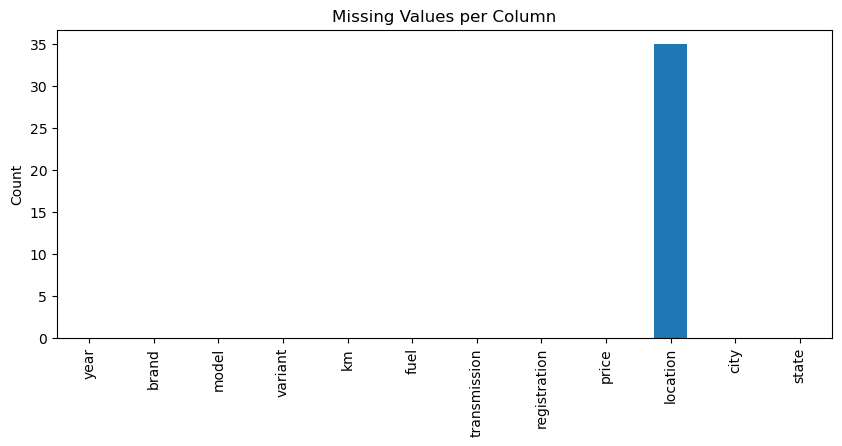

In [231]:
df.isna().sum().plot(kind='bar',figsize=(10,4))
plt.title('Missing Values per Column')
plt.ylabel('Count')
plt.show()

**Location column has null values**

In [232]:
# Checking for Duplicate entries
df.duplicated().sum()

0

In [233]:
# Checking for null values count
df.isna().sum()

year             0
brand            0
model            0
variant          0
km               0
fuel             0
transmission     0
registration     0
price            0
location        35
city             0
state            0
dtype: int64

In [234]:
# Imputing null values with not found 
df['location']=df['location'].fillna('location not found')

In [235]:
df.isna().sum()

year            0
brand           0
model           0
variant         0
km              0
fuel            0
transmission    0
registration    0
price           0
location        0
city            0
state           0
dtype: int64

## Outlier Analysis

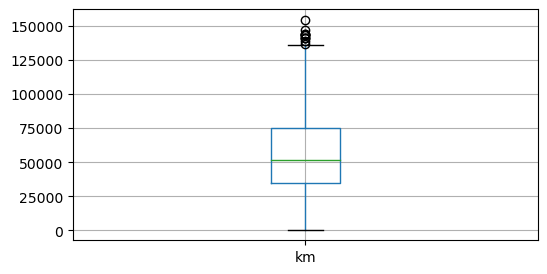

In [236]:
# Checking for outliers in km column 
df[['km']].boxplot(figsize=(6,3))
plt.show()

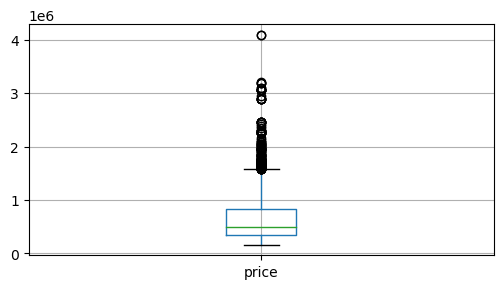

In [237]:
# Checking for outliers in km column 
df[['price']].boxplot(figsize=(6,3))
plt.show()

**Detected Outliers in km column and price column**

## Treating Outliers

In [238]:
def remove_outliers_iqr(df, col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    return df[(df[col]>=lower) & (df[col] <= upper)]
df = remove_outliers_iqr(df, 'km')
df = remove_outliers_iqr(df, 'price')

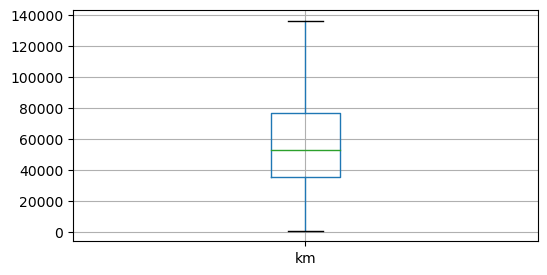

In [239]:
# km column after treating outliers
df[['km']].boxplot(figsize=(6,3))
plt.show()

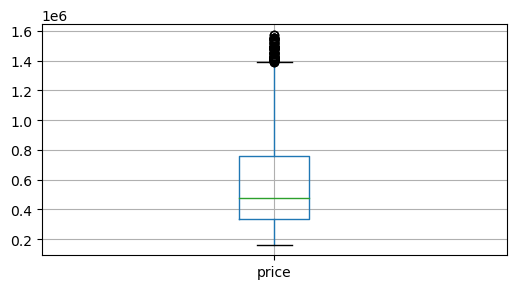

In [240]:
df[['price']].boxplot(figsize=(6,3))
plt.show()

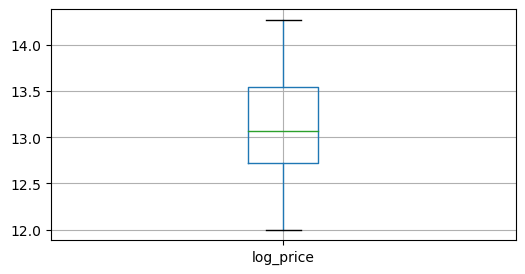

In [241]:
df['log_price'] = np.log1p(df['price'])
df[['log_price']].boxplot(figsize=(6,3))
plt.show()

In [242]:
df.shape
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3741 entries, 0 to 3919
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          3741 non-null   int64  
 1   brand         3741 non-null   object 
 2   model         3741 non-null   object 
 3   variant       3741 non-null   object 
 4   km            3741 non-null   float64
 5   fuel          3741 non-null   object 
 6   transmission  3741 non-null   object 
 7   registration  3741 non-null   object 
 8   price         3741 non-null   float64
 9   location      3741 non-null   object 
 10  city          3741 non-null   object 
 11  state         3741 non-null   object 
 12  log_price     3741 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 409.2+ KB


## Distribution Analysis

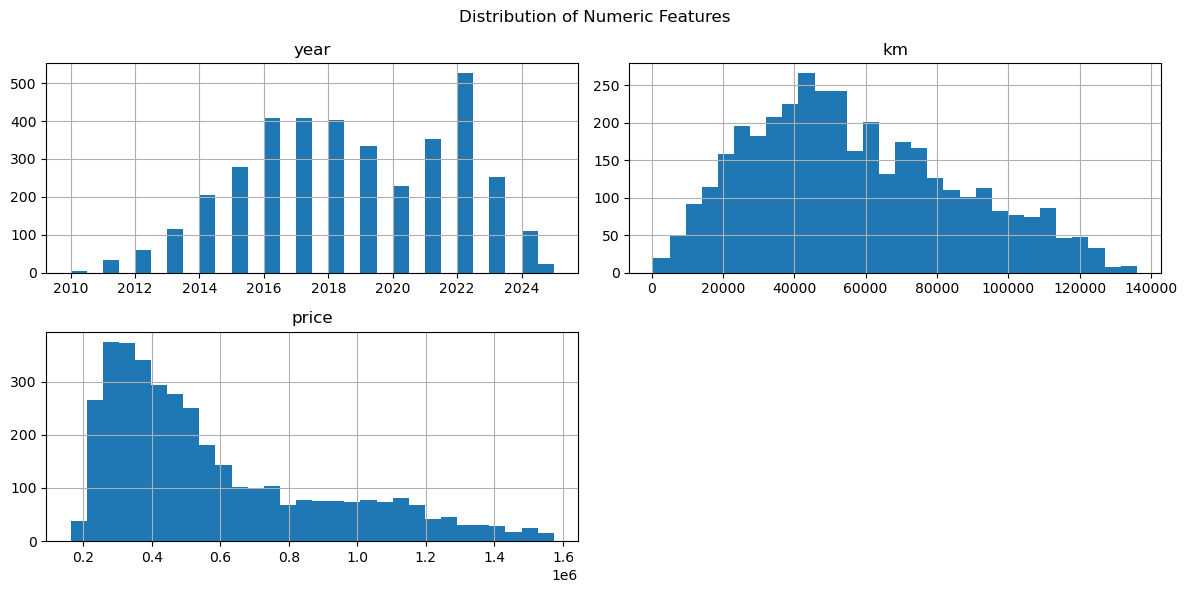

In [243]:
df[['year','km','price']].hist(bins=30, figsize=(12,6))
plt.suptitle('Distribution of Numeric Features')
plt.tight_layout()
plt.show()

**Price column is much right skewed**
**Price column skewness can be reduced by applying log transformation**

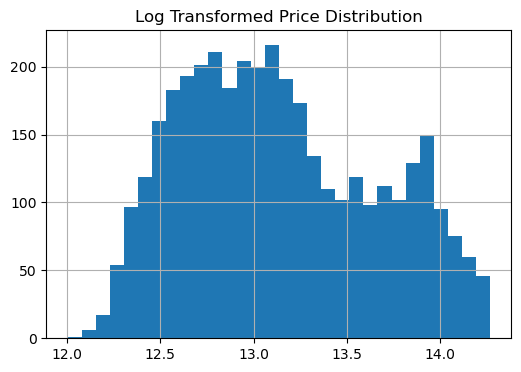

In [244]:
# Applying logorithmic transformation
df['log_price'] = np.log1p(df['price'])

df[['log_price']].hist(bins=30, figsize=(6,4))
plt.title('Log Transformed Price Distribution')
plt.show()

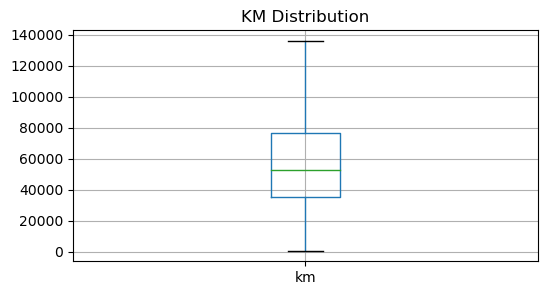

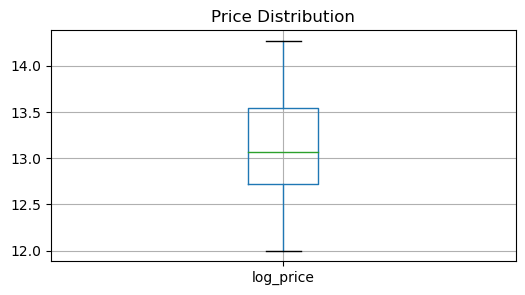

In [245]:
df[['km']].boxplot(figsize=(6,3))
plt.title('KM Distribution')
plt.show()

df[['log_price']].boxplot(figsize=(6,3))
plt.title('Price Distribution')
plt.show()


## Categorical Analysis

### Top Brands

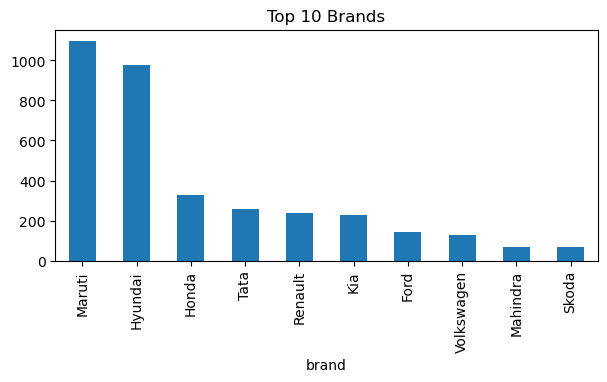

In [246]:
df['brand'].value_counts().head(10).plot(kind='bar', figsize=(7,3))
plt.title('Top 10 Brands')
plt.show()

### Fuel Type Distribution

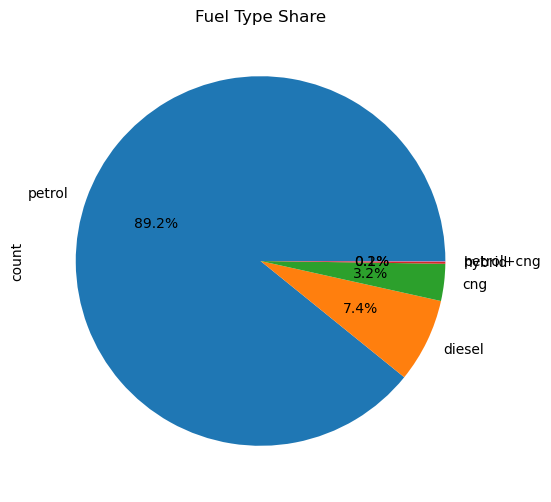

In [247]:
df['fuel'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(6,6))
plt.title('Fuel Type Share')
plt.show()

### Transmission Distribution

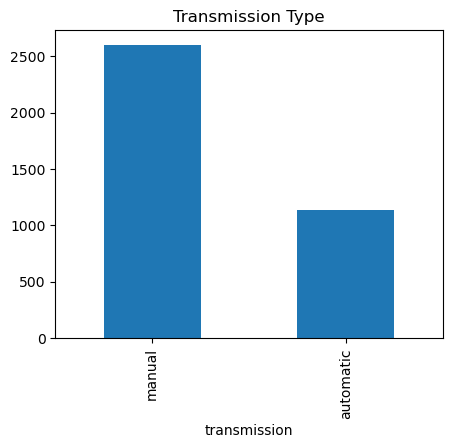

In [248]:
df['transmission'].value_counts().plot(kind='bar',figsize=(5,4))
plt.title('Transmission Type')
plt.show()

### Price analysis

* **Price by Fuel Type**

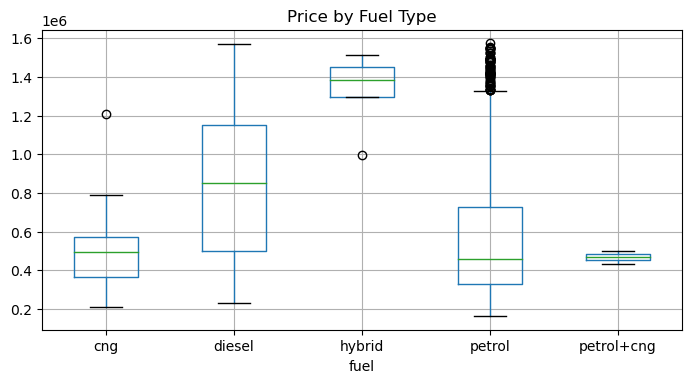

In [255]:
df.boxplot(column='price',by='fuel',figsize=(8,4))
plt.title('Price by Fuel Type')
plt.suptitle('')
plt.show()

### Price by Transmission Type

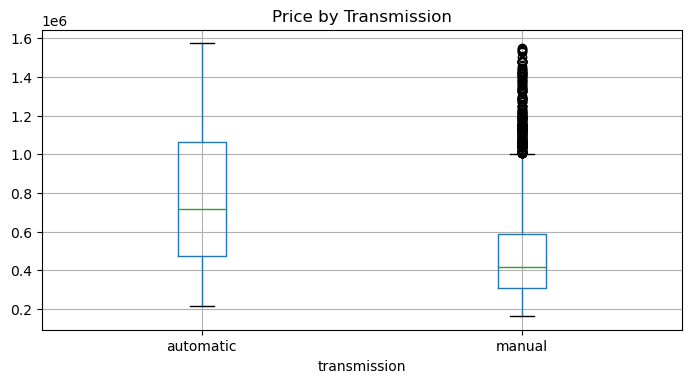

In [256]:
df.boxplot(column='price', by='transmission', figsize=(8,4))
plt.title('Price by Transmission')
plt.suptitle('')
plt.show()

### KM driven vs Price Relationship

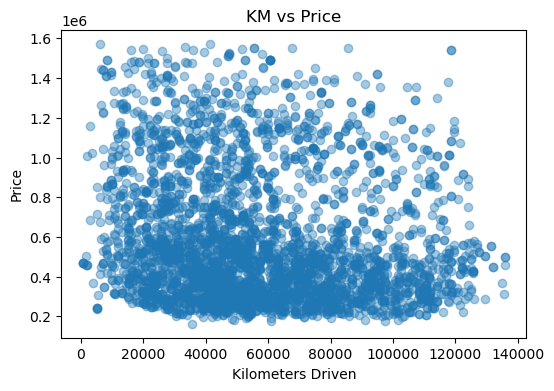

In [251]:
plt.figure(figsize=(6,4))
plt.scatter(df['km'],df['price'],alpha=0.4)
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.title('KM vs Price')
plt.show()

### Year vs Price (Depreciation Trend)

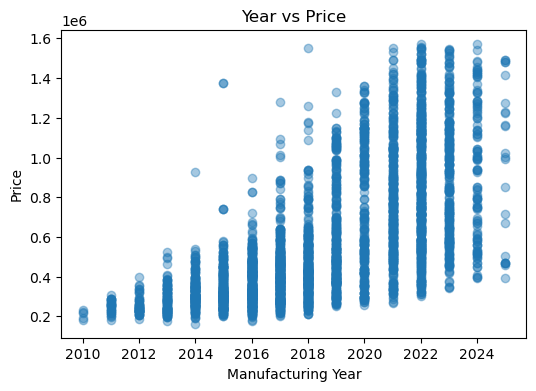

In [257]:
plt.figure(figsize=(6,4))
plt.scatter(df['year'], df['price'], alpha=0.4)
plt.xlabel('Manufacturing Year')
plt.ylabel('Price')
plt.title('Year vs Price')
plt.show()

## Location & Geography Analysis

### Top Cities

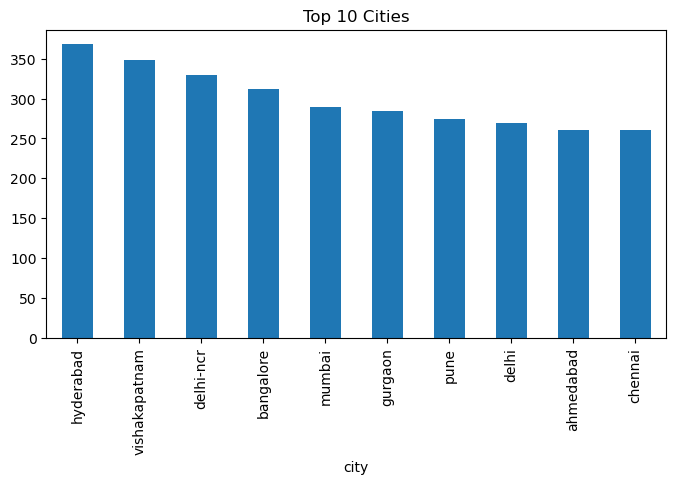

In [258]:
df['city'].value_counts().head(10).plot(kind='bar', figsize=(8,4))
plt.title('Top 10 Cities')
plt.show()

### State-wise Average Price

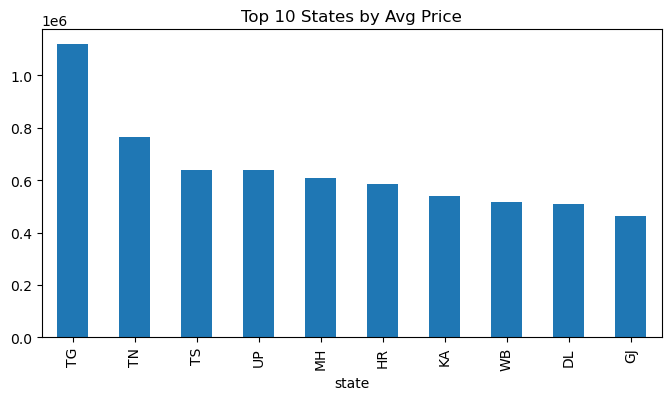

In [259]:
df.groupby('state')['price'].mean().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(8,4))
plt.title('Top 10 States by Avg Price')
plt.show()

## Correlation Analysis

In [208]:
df[['year','km','log_price']].corr()

,year,km,log_price
year,1.000000,-0.379367,0.727994
km,-0.379367,1.000000,-0.165263
log_price,0.727994,-0.165263,1.000000


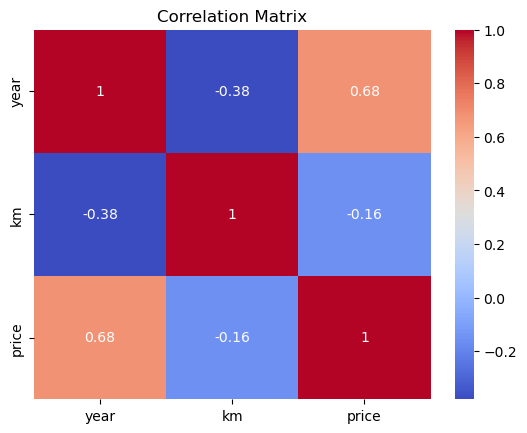

In [261]:
sns.heatmap(
    df[['year','km','price']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Matrix')
plt.show()

## Hypothesis Testing

### Is car price correlated with kilometers driven?
    KM driven vs Price

   **Hypotheses**

    H₀: No correlation between km and price

    H₁: Significant correlation exists

In [262]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df['km'], df['price'])

print("Correlation:", corr)
print("p-value:", p_value)
if(corr<0):print("Price decreases as km increases i.e. The Negative relationship exists")
if(p_value<0.05):print("Relationship is statistically significant")

Correlation: -0.15843068564712545
p-value: 1.8703074562664733e-22
Price decreases as km increases i.e. The Negative relationship exists
Relationship is statistically significant


### Does fuel type affect being expensive?

   **Hypothesis**

    H₀: Fuel type and price category are independent

    H₁: Fuel type affects likelihood of high price

In [118]:
from scipy.stats import chi2_contingency

df['high_price'] = (df['price'] > df['price'].median()).astype(int)
contingency = pd.crosstab(df['fuel'], df['high_price'])
chi2, p_value, dof, expected = chi2_contingency(contingency)
print("p-value:", p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject H₀ → Fuel type and price category are dependent")
else:
    print("Fail to reject H₀ → No significant relationship")

p-value: 4.25848490111163e-25
Reject H₀ → Fuel type and price category are dependent


### Do automatic cars have higher price?
**Hypotheses**

    H₀: Transmission does not affect price category

    H₁: Automatic cars are more expensive

In [122]:
contingency = pd.crosstab(df['transmission'],df['high_price'])
chi2, p_value, dof, expected = chi2_contingency(contingency)
print("p-value:",p_value)
alpha = 0.05
if p_value<alpha:
    print("Reject H₀ → Transmission type affects price category")
else:
    print("Fail to reject H₀ → No significant relationship")


p-value: 2.603051785647737e-88
Reject H₀ → Transmission type affects price category


### Do newer cars (≥2018) have higher prices than older cars?

**Hypothesis**

    H₀ :Mean price of newer cars = Mean price of older cars
    H₁ :Mean price of newer cars > Mean price of older cars

In [267]:
from statsmodels.stats.weightstats import ztest
new_cars = df[df['year'] >= 2018]['price']
old_cars = df[df['year'] < 2018]['price']
z_stat, p_value = ztest(new_cars,old_cars,alternative='larger')

print("Z-statistic:", z_stat)
print("p-value:", p_value)
alpha = 0.05

if p_value<alpha:
    print("Reject H₀ → Newer cars (≥2018) have significantly higher prices")
else:
    print("Fail to reject H₀ → No significant price difference")


Z-statistic: 41.63761010358916
p-value: 0.0
Reject H₀ → Newer cars (≥2018) have significantly higher prices


## ✅ Conclusion

This project demonstrates how **data analytics can eliminate uncertainty** in used-car purchasing decisions.

### 🔑 Key Outcomes
- Identified key factors influencing used car prices such as **year, distance driven, transmission, and fuel type**
- Statistically validated assumptions using **hypothesis testing**
- Built a **price prediction model** to estimate fair market value
- Converted unstructured web data into **actionable insights**

### 🚀 Business Impact
- Helps buyers **avoid overpaying**
- Improves trust through **transparent, data-driven evaluation**
- Acts as a **decision-support system** for used-car customers

Overall, this project bridges the gap between raw marketplace data and informed consumer decisions, highlighting the power of analytics in solving real-world business problems.
